(100, 2)
[[ 0.          0.        ]
 [ 0.38430439  0.14768986]
 [ 0.73168632  0.53536485]
 [ 1.04569314  1.09347413]
 [ 1.32953141  1.76765377]
 [ 1.58609962  2.51571199]
 [ 1.81801774  3.30518852]
 [ 2.02765409  4.11138109]
 [ 2.21714938  4.9157514 ]
 [ 2.38843871  5.70463951]
 [ 2.54327123  6.46822859]
 [ 2.68322805  7.19971279]
 [ 2.80973836  7.89462968]
 [ 2.92409405  8.55032606]
 [ 3.0274629   9.16553164]
 [ 3.12090047  9.74001977]
 [ 3.20536092 10.27433868]
 [ 3.28170674 10.76959919]
 [ 3.35071755 11.22730818]
 [ 3.41309808 11.64923854]
 [ 3.46948532 12.03732846]
 [ 3.5204551  12.39360418]
 [ 3.56652791 12.72012135]
 [ 3.60817421 13.01892119]
 [ 3.64581931 13.29199844]
 [ 3.67984761 13.54127842]
 [ 3.7106066  13.76860135]
 [ 3.73841039 13.97571224]
 [ 3.7635429  14.16425515]
 [ 3.78626077 14.33577066]
 [ 3.806796   14.49169582]
 [ 3.82535829 14.63336604]
 [ 3.84213718 14.76201813]
 [ 3.85730403 14.87879435]
 [ 3.8710137  14.98474705]
 [ 3.8834062  15.08084371]
 [ 3.89460808 15.16

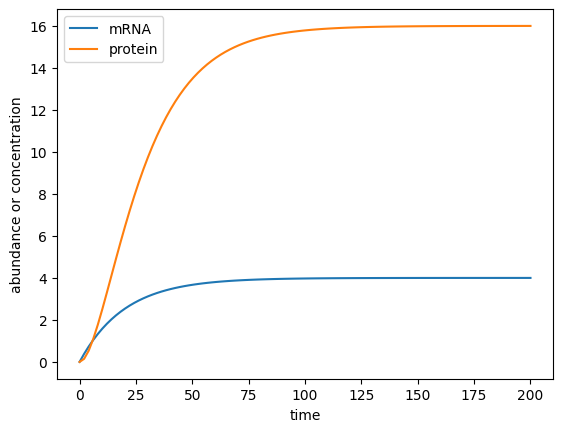

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint #for ordinary differential equations

#y0 - initial conditions; convention for ODEs
y0 = [0,0] #start with 0 mRNAs, 0 proteins

#time points    
t = np.linspace(0,200,num=100) #num = 100 different time point

k_m = 0.2
gamma_m = 0.05 #good simulation if gamma_m < k_m
k_p = 0.4
gamma_p = 0.1 #good simulation if gamma_p < k_p


#set all params in an array
params = [k_m, gamma_m, k_p, gamma_p]

#define the ordinary differential equation
#fxn wil take 3 arguments
#variables = array that stores values of m and p
def sim(variables, t, params):
    m = variables[0]
    p = variables[1]

    k_m = params[0]
    gamma_m = params[1]
    k_p = params[2]
    gamma_p = params[3]

    dmdt = k_m - gamma_m * m
    dpdt = k_p*m - gamma_p * p

    return [dmdt, dpdt] #order must be the same with variables array

#running the simulation, y as output (convention naming)
#odeint must be defined by a function THAT IS ALREADY IN DERIVATIVE FORM
#   odeint(fxn,intialcondition,timepoints,arguments) 
y = odeint(sim,y0,t,args=(params,))

#plotting the values   remember y is an array with outputs from the sim() fxn which is an array
plt.plot(t,y[:,0],label="mRNA")
plt.plot(t,y[:,1],label="protein")

plt.xlabel("time")
plt.ylabel("abundance or concentration")
plt.legend()
plt.show()